# Random Forest
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hp                      1206 non-null   int64  
 1   land_speed              1206 non-null   float64
 2   cha                     1206 non-null   int64  
 3   perception              1206 non-null   int64  
 4   wis                     1206 non-null   int64  
 5   book                    1206 non-null   object 
 6   level                   1206 non-null   int64  
 7   str                     1206 non-null   int64  
 8   int                     1206 non-null   int64  
 9   focus                   1206 non-null   int32  
 10  dex                     1206 non-null   int64  
 11  will                    1206 non-null   int64  
 12  con                     1206 non-null   int64  
 13  num_immunities          1206 non-null   int64  
 14  fortitude               1206 non-null   

In [3]:
df.head()

,hp,land_speed,cha,perception,wis,book,level,str,int,focus,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,215,30.0,1,20,2,Pathfinder Bestiary,10,7,1,1,...,0,0,0,0,0,0,23,22.0,0,0.0
1,220,35.0,1,16,2,Pathfinder Bestiary,10,9,-4,0,...,0,0,0,0,0,0,23,22.0,0,0.0
2,175,30.0,-2,17,3,Pathfinder Bestiary,8,7,-4,0,...,0,0,0,0,0,0,21,16.0,0,0.0
3,315,50.0,6,30,5,Pathfinder Bestiary,17,7,6,1,...,1,0,1,0,0,0,33,31.5,0,0.0
4,20,0.0,1,6,1,Pathfinder Bestiary,1,-5,-1,1,...,1,0,0,0,0,0,0,0.0,8,5.0


## Train test split

### Chronological split

In [4]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/random_forest")

In [5]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

In [6]:
X_train = X_train.astype("int64")
y_train = y_train.astype("int64")

### Random split

In [7]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [8]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## Random Forest

### With chronological split

In [9]:
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(n_estimators=500, max_depth=2, random_state=0, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1, random_state=0)

In [10]:
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 2.25
MAE: 1.45


In [12]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

###### MAE by level

In [13]:
from training.results import plot_mae_by_level

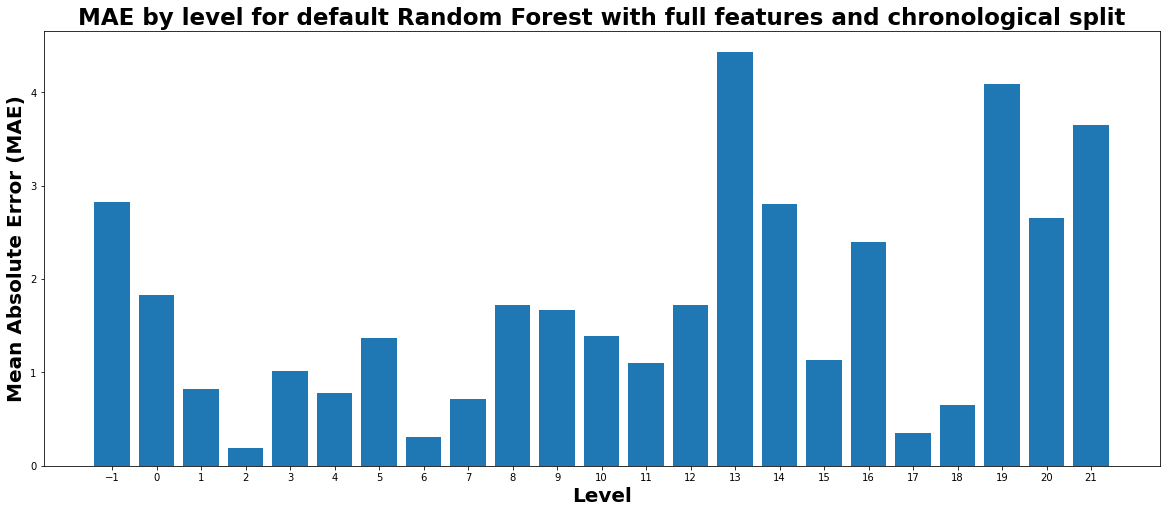

In [14]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default Random Forest with full features and chronological split",
)

In [15]:
from training.results import check_round_predictions, plot_confusion_matrix


check_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 2.25

Round type: 0.5
RMSE: 2.31

Round type: 0.33
RMSE: 2.24

Round type: 0.45
RMSE: 2.30



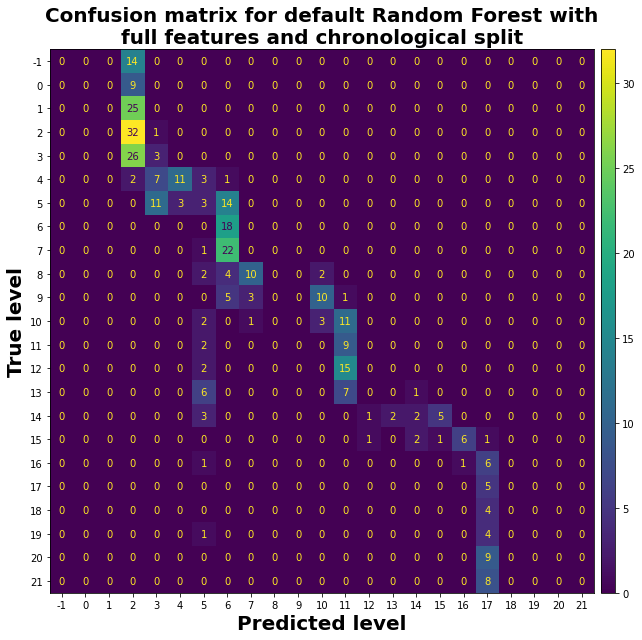

In [16]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default Random Forest with\nfull features and chronological split",
)

#### Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(10, 111, 10)) + [None]

hyper_params = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
}

hyper_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [18]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    random_state=42,
    return_train_score=True,
)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   2.0s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   1.7s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   1.9s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.4s
[CV] END .max_depth=None, max_features=0.1, n_estimators=800; total time=   2.2s
[CV] END .max_depth=None, max_features=0.1, n_estimators=800; total time=   1.9s
[CV] END .max_depth=None, max_features=0.1, n_

[CV] END ...max_depth=30, max_features=0.1, n_estimators=800; total time=   1.9s
[CV] END ...max_depth=30, max_features=0.2, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=30, max_features=0.2, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=30, max_features=0.2, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.4, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=20, max_features=0.4, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=20, max_features=0.4, n_estimators=600; total time=   1.4s
[CV] END ...max_depth=20, max_features=0.1, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.1, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=60, max_features=0.05, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=60, max_features=0.05, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=60, max

[CV] END ...max_depth=60, max_features=0.1, n_estimators=500; total time=   1.1s
[CV] END .max_depth=20, max_features=0.025, n_estimators=500; total time=   1.2s
[CV] END .max_depth=20, max_features=0.025, n_estimators=500; total time=   1.1s
[CV] END .max_depth=20, max_features=0.025, n_estimators=500; total time=   1.0s
[CV] END ...max_depth=30, max_features=0.1, n_estimators=600; total time=   1.4s
[CV] END ...max_depth=30, max_features=0.1, n_estimators=600; total time=   1.4s
[CV] END ...max_depth=30, max_features=0.1, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=10, max_features=0.2, n_estimators=700; total time=   1.7s
[CV] END ...max_depth=10, max_features=0.2, n_estimators=700; total time=   1.7s
[CV] END ...max_depth=10, max_features=0.2, n_estimators=700; total time=   1.6s
[CV] END ..max_depth=20, max_features=0.05, n_estimators=600; total time=   1.3s
[CV] END ..max_depth=20, max_features=0.05, n_estimators=600; total time=   1.3s
[CV] END ..max_depth=20, max

{'n_estimators': 300, 'max_features': 0.3, 'max_depth': 20}

In [19]:
y_pred_test = rf_random.predict(X_test)

In [20]:
from training.results import assess_regression_model


rmse, mae = assess_regression_model(rf_random, X_train, X_test, y_train, y_test)

RMSE train: 0.13
RMSE test: 0.83
MAE test: 0.44



In [21]:
results.loc[1] = [
    "chronological",
    "RandomizedSearchCV",
    "full",
    rmse,
    mae,
]

###### MAE by level

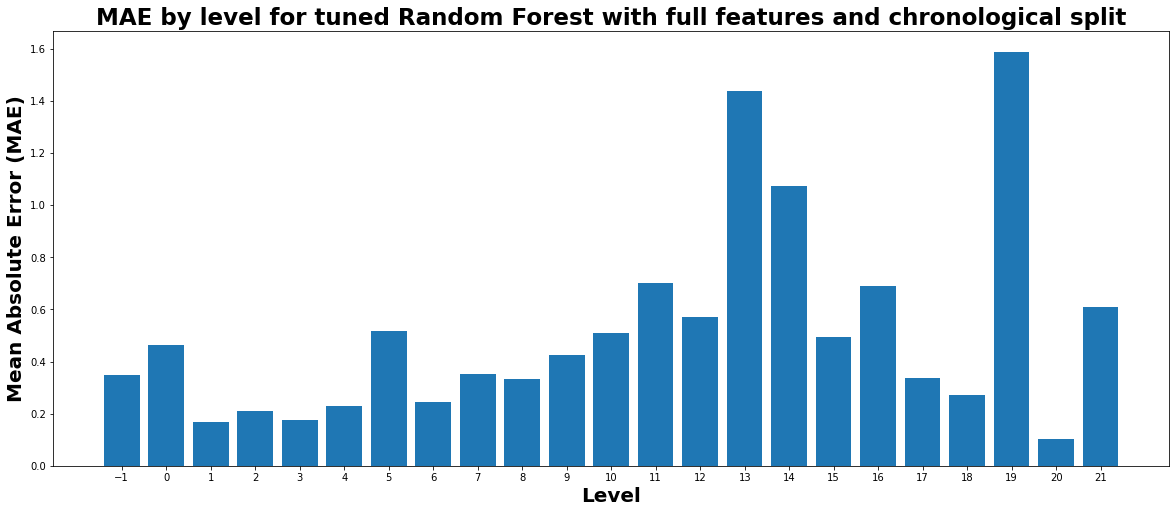

In [22]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned Random Forest with full features and chronological split",
)

In [23]:
check_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.83

Round type: 0.5
RMSE: 0.88

Round type: 0.33
RMSE: 0.80

Round type: 0.45
RMSE: 0.87



### Attempt to decrease overfitting
Change max_depth to 8

In [24]:
rf = RandomForestRegressor(
    random_state=0, n_jobs=-1, n_estimators=600, max_features=0.5, max_depth=8
)
rf.fit(X_train, y_train)
rmse, mae = assess_regression_model(rf, X_train, X_test, y_train, y_test)

RMSE train: 0.17
RMSE test: 1.01
MAE test: 0.48



In [25]:
y_pred_test = rf.predict(X_test)

In [26]:
results.loc[2] = [
    "chronological",
    "minimise_overfitting",
    "full",
    rmse,
    mae,
]

###### MAE by level

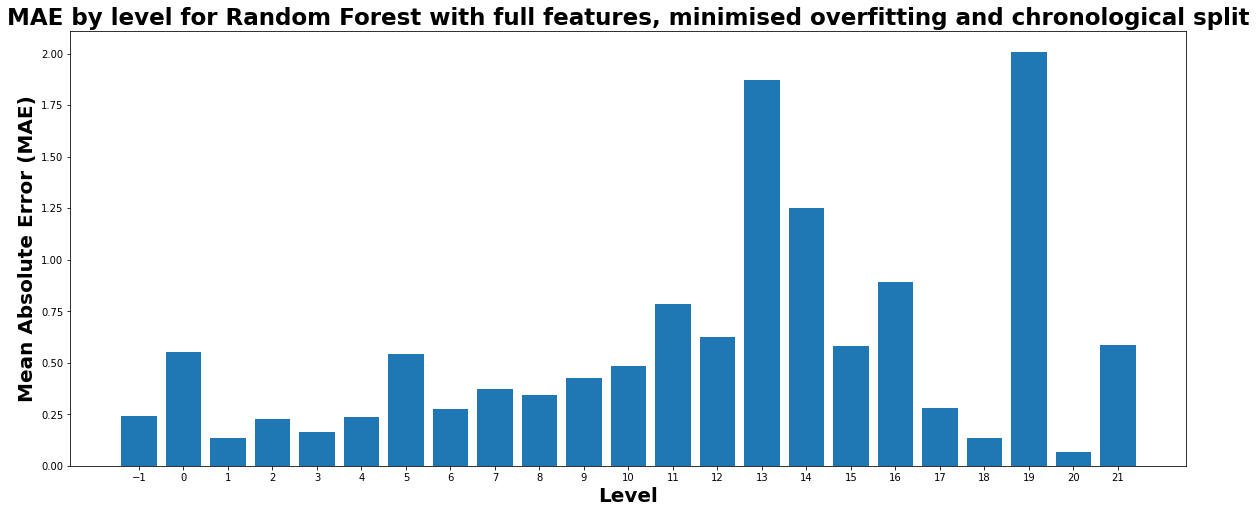

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Random Forest with full features, minimised overfitting and chronological split",
)

In [28]:
check_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 1.01

Round type: 0.5
RMSE: 1.04

Round type: 0.33
RMSE: 1.02

Round type: 0.45
RMSE: 1.04



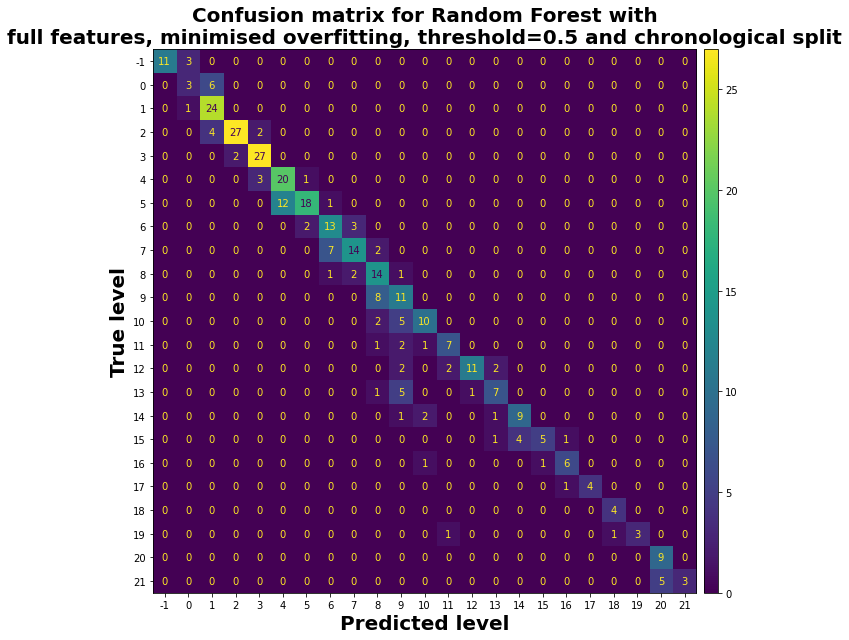

In [29]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for Random Forest with\nfull features, minimised overfitting, threshold=0.5 and chronological split",
)

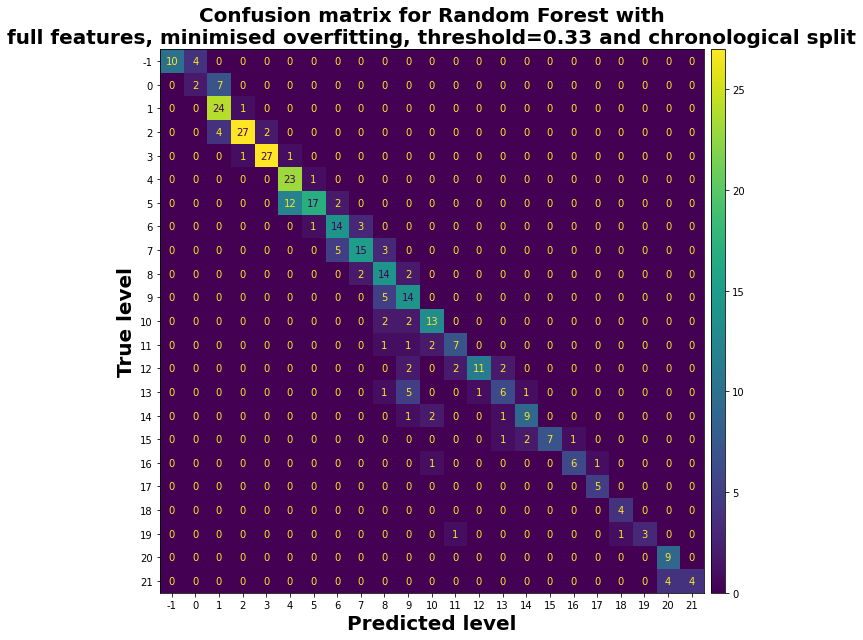

In [30]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    0.33,
    title="Confusion matrix for Random Forest with\nfull features, minimised overfitting, threshold=0.33 and chronological split",
)

### Random split

In [31]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=2, random_state=0, n_jobs=-1)
rf_reg.fit(X_train_random_split, y_train_random_split)

RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1, random_state=0)

In [32]:
y_pred_train_random_split = rf_reg.predict(X_train_random_split)
y_pred_test_random_split = rf_reg.predict(X_test_random_split)

In [33]:
rmse = mean_squared_error(y_test_random_split, y_pred_test_random_split, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test_random_split)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 1.23
MAE: 1.00


In [34]:
results.loc[3] = ["random", "default", "full", rmse, mae]

###### MAE by level

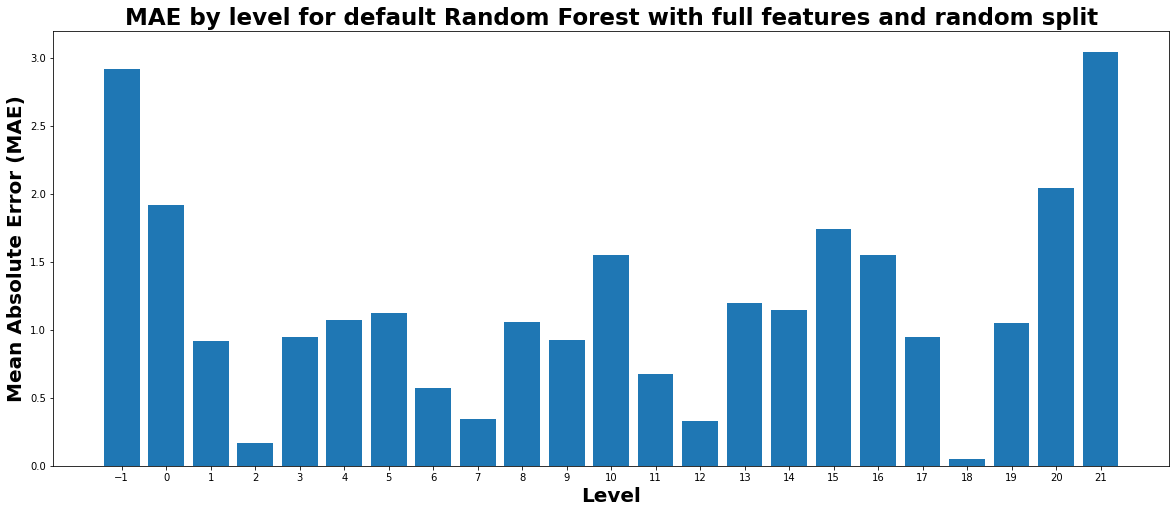

In [35]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for default Random Forest with full features and random split",
)

In [36]:
check_round_predictions(
    [0.5, 0.33, 0.45], y_test_random_split, y_pred_test_random_split
)

Default:
RMSE: 1.23

Round type: 0.5
RMSE: 1.28

Round type: 0.33
RMSE: 1.28

Round type: 0.45
RMSE: 1.29



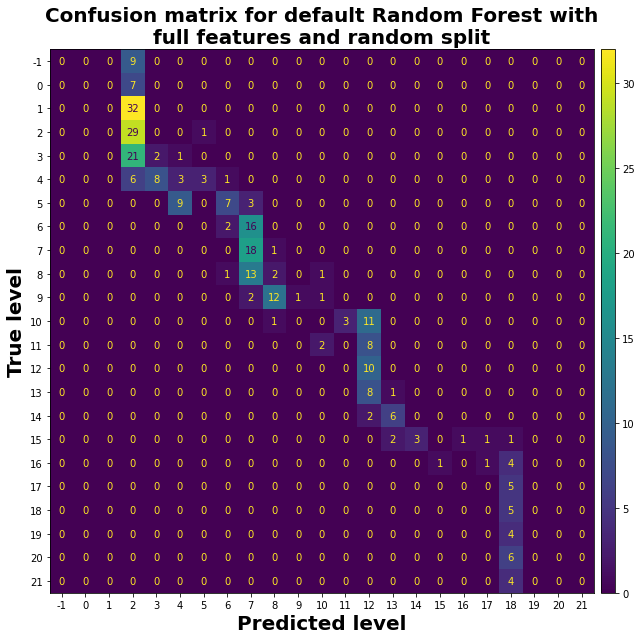

In [37]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    title="Confusion matrix for default Random Forest with\nfull features and random split",
)

#### Tuning

In [38]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(10, 111, 10)) + [None]

hyper_params = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
}

hyper_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [39]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    random_state=42,
    return_train_score=True,
)

rf_random.fit(X_train_random_split, y_train_random_split)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   1.8s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   1.9s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   2.0s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   0.8s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   0.7s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   0.7s
[CV] END ...max_depth=70, max_features=0.5, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=70, max_features=0.5, n_estimators=600; total time=   1.7s
[CV] END ...max_depth=70, max_features=0.5, n_

[CV] END ..max_depth=110, max_features=0.4, n_estimators=700; total time=   1.8s
[CV] END ..max_depth=100, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=100, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=100, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=30, max_features=0.5, n_estimators=600; total time=   1.6s
[CV] END ...max_depth=30, max_features=0.5, n_estimators=600; total time=   1.4s
[CV] END ...max_depth=30, max_features=0.5, n_estimators=600; total time=   1.4s
[CV] END ...max_depth=80, max_features=0.3, n_estimators=700; total time=   1.6s
[CV] END ...max_depth=80, max_features=0.3, n_estimators=700; total time=   1.8s
[CV] END ...max_depth=80, max_features=0.3, n_estimators=700; total time=   2.1s
[CV] END ...max_depth=50, max_features=0.2, n_estimators=600; total time=   1.4s
[CV] END ...max_depth=50, max_features=0.2, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=50, ma

[CV] END ...max_depth=20, max_features=0.4, n_estimators=500; total time=   1.2s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=60, max_features=0.3, n_estimators=300; total time=   0.7s
[CV] END ...max_depth=60, max_features=0.3, n_estimators=300; total time=   0.7s
[CV] END ...max_depth=60, max_features=0.3, n_estimators=300; total time=   0.7s
[CV] END ...max_depth=80, max_features=0.4, n_estimators=700; total time=   1.9s
[CV] END ...max_depth=80, max_features=0.4, n_estimators=700; total time=   1.9s
[CV] END ...max_depth=80, max_features=0.4, n_estimators=700; total time=   1.8s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=800; total time=   2.1s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=800; total time=   2.1s
[CV] END ...max_depth=20, ma

{'n_estimators': 800, 'max_features': 0.3, 'max_depth': 110}

In [40]:
y_pred_test_random_split = rf_random.predict(X_test_random_split)

In [41]:
rmse, mae = assess_regression_model(
    rf_random,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.14
RMSE test: 0.33
MAE test: 0.22



In [42]:
results.loc[4] = ["random", "RandomizedSearchCV", "full", rmse, mae]

###### MAE by level

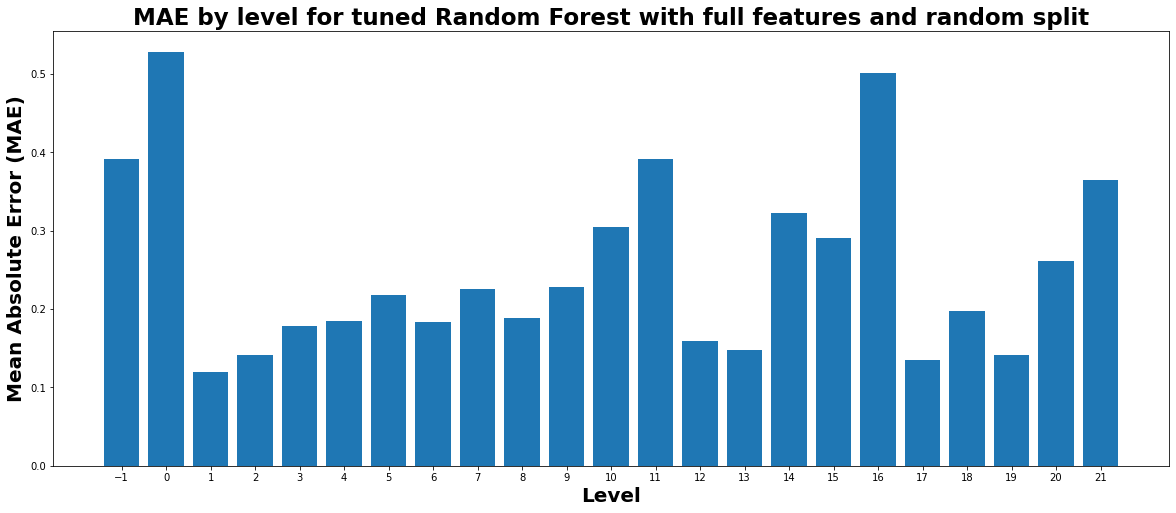

In [43]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for tuned Random Forest with full features and random split",
)

### Attempt to decrease overfitting
Change max_depth to 13

In [44]:
rf = RandomForestRegressor(
    random_state=0, n_jobs=-1, n_estimators=800, max_features=0.5, max_depth=13
)
rf.fit(X_train_random_split, y_train_random_split)
rmse, mae = assess_regression_model(
    rf,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.15
RMSE test: 0.35
MAE test: 0.23



In [45]:
y_pred_test_random_split = rf.predict(X_test_random_split)

In [46]:
results.loc[5] = [
    "random",
    "minimise_overfitting",
    "full",
    rmse,
    mae,
]

###### MAE by level

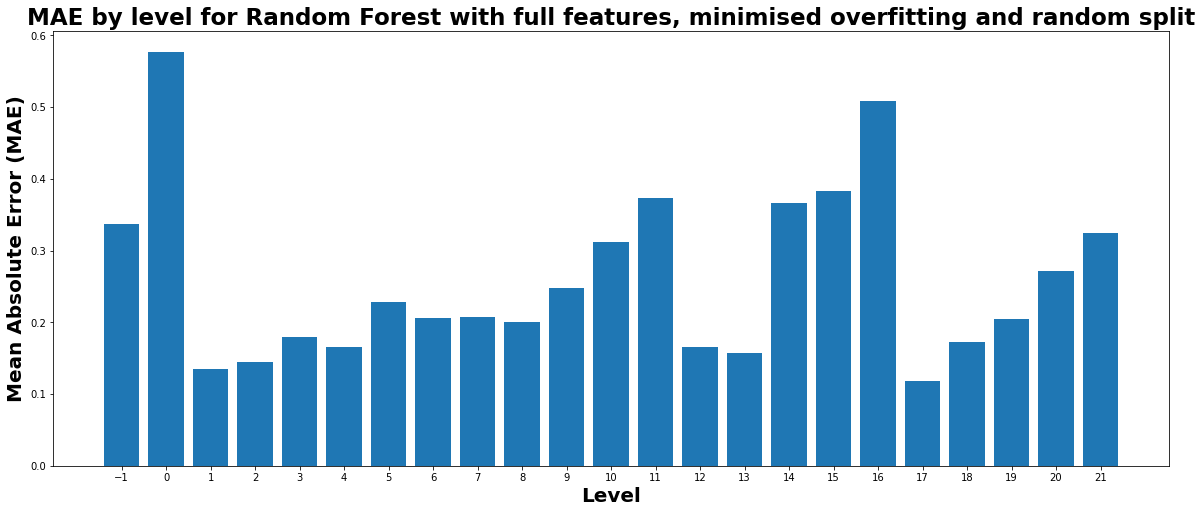

In [47]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Random Forest with full features, minimised overfitting and random split",
)

Check rounded predictions

In [48]:
check_round_predictions(
    [0.5, 0.33, 0.45], y_test_random_split, y_pred_test_random_split
)

Default:
RMSE: 0.35

Round type: 0.5
RMSE: 0.40

Round type: 0.33
RMSE: 0.42

Round type: 0.45
RMSE: 0.40



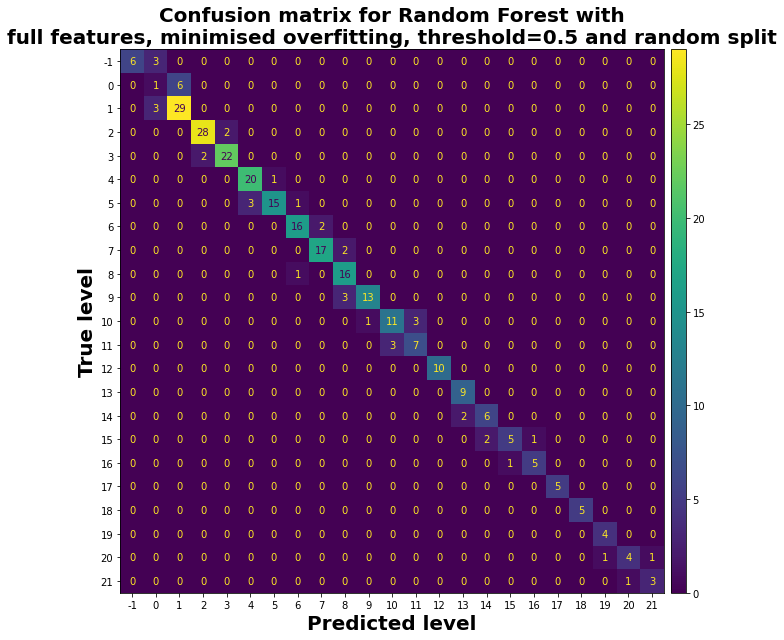

In [49]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    title="Confusion matrix for Random Forest with\nfull features, minimised overfitting, threshold=0.5 and random split",
)

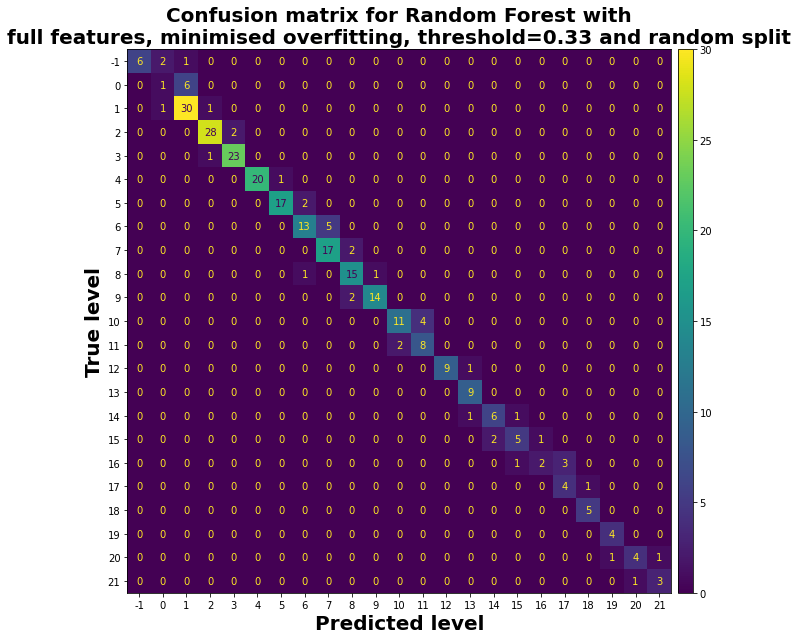

In [50]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    0.33,
    title="Confusion matrix for Random Forest with\nfull features, minimised overfitting, threshold=0.33 and random split",
)

## Summary

In [51]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,2.247711,1.454898
1,chronological,RandomizedSearchCV,full,0.829265,0.440995
2,chronological,minimise_overfitting,full,1.009850,0.478970
3,random,default,full,1.229576,0.996461
4,random,RandomizedSearchCV,full,0.333432,0.220745
5,random,minimise_overfitting,full,0.353925,0.227273


In [52]:
from training.results import plot_summary

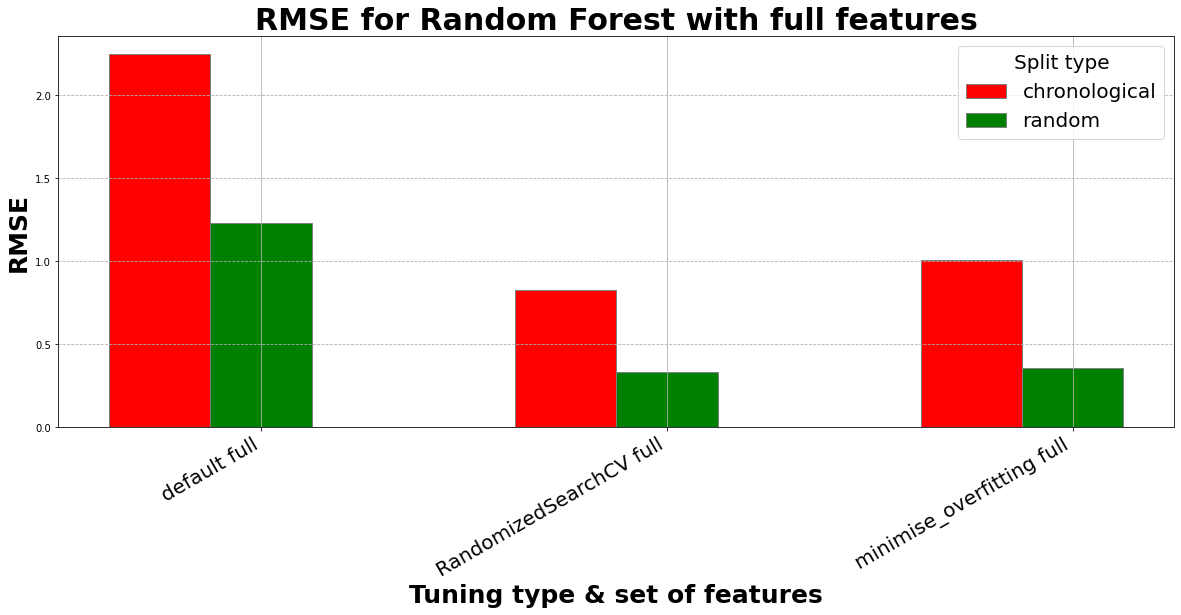

In [53]:
plot_summary(results, "RMSE", title="RMSE for Random Forest with full features")

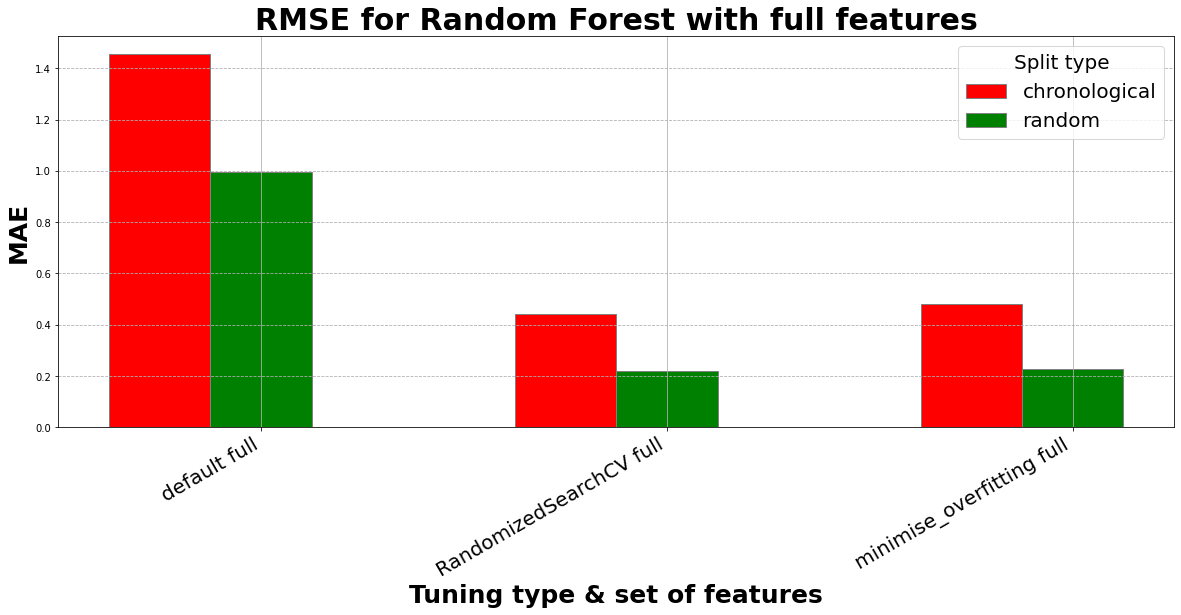

In [54]:
plot_summary(results, "MAE", title="RMSE for Random Forest with full features")

In [55]:
results.to_json("./random_forest_full_results.json", indent=2)